# Fitting

There are two built in fitting engines, `lmfit` and `bumps`.

Import all the packages.

In [5]:
# Import all the packages
import numpy as np
from easyDiffractionLib.sample import Sample
from easyDiffractionLib import Crystals
from easyDiffractionLib.interface import InterfaceFactory
from easyDiffractionLib.Elements.Instruments.Instrument import Pars1D
from easyCore.Fitting.Fitting import Fitter

import matplotlib.pyplot as plt

## Preparing the sample and data

We load up a cif file and then set the experimental parameters. The resolution has to be changed from the default as the peaks are too sharp

In [6]:
interface = InterfaceFactory()
c = Crystals.from_cif_file('SrTiO3.cif')
S = Sample(phases=c, parameters=Pars1D.default(), interface=interface)
S.parameters.u_resolution = 0.4
S.parameters.v_resolution = -0.5
S.parameters.w_resolution = 0.9
S.parameters.x_resolution = 0.0
S.parameters.y_resolution = 0.0

Make some experimental data where we have varied the lattice parameter a

In [7]:
# Make a note of the starting a value
starting_a = S.phases[0].cell.length_a.raw_value
# x-data
ex_x_data = np.linspace(0, 100, 501)
# New cell length a
ex_data_a = starting_a * (1 + 0.15*(np.random.rand()-0.5))
print('Sim Starting Cell:\n{:s}'.format(str(S.phases[0].cell)))

# Set the new a, which will be fitted.
S.phases[0].cell.length_a = ex_data_a
print('Exp Cell:\n{:s}'.format(str(S.phases[0].cell)))

# Generate the experimental y-data
ex_y_data = interface.fit_func(ex_x_data)
# Reset the model back to the starting point
S.phases[0].cell.length_a = starting_a

Sim Starting Cell:
<Cell: (a: 5.52 Å, b: 5.52 Å, c: 7.81Å, alpha: 90.00 deg, beta: 90.00 deg, gamma: 90.00 deg>
Exp Cell:
<Cell: (a: 5.73 Å, b: 5.52 Å, c: 7.81Å, alpha: 90.00 deg, beta: 90.00 deg, gamma: 90.00 deg>


<IPython.core.display.Javascript object>


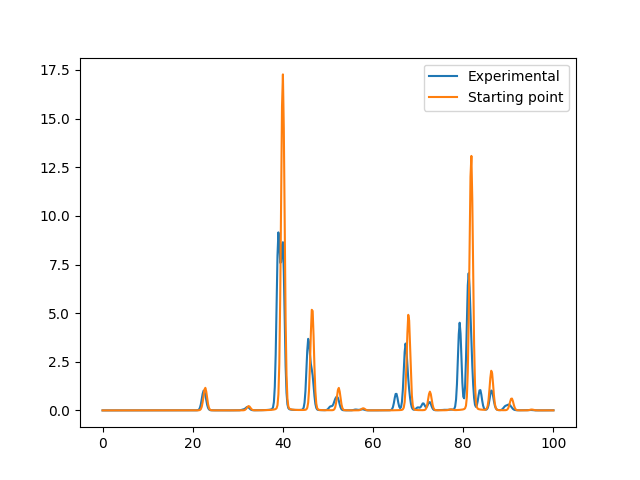

In [11]:
starting_y_data = interface.fit_func(ex_x_data)
%matplotlib notebook
plt.plot(ex_x_data, ex_y_data, label='Experimental')
plt.plot(ex_x_data, starting_y_data, label='Starting point')
plt.legend()

## Fitting to the data

Initalize the fitting engine and apply a few constraints

In [12]:
f = Fitter(S, interface.fit_func)

S.phases[0].cell.length_a.fixed = False
S.phases[0].cell.length_a.min = 4
S.phases[0].cell.length_a.max = 8

Perform the fit

In [14]:
result = f.fit(ex_x_data, ex_y_data, method='brute')
result = f.fit(ex_x_data, ex_y_data)

if result.success:
    print("The fit has been successful: {}".format(result.success))

The fit has been successful: True


In [15]:
print(S.phases[0].cell.length_a)
print('Expected value {}'.format(ex_data_a))

<Parameter 'length_a': 5.7265+/-0 Å, bounds=[4:8]>
Expected value 5.7265173946279315


<IPython.core.display.Javascript object>


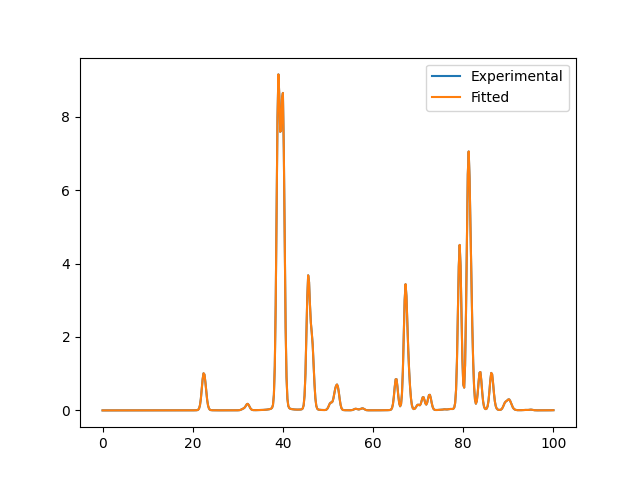

In [16]:
%matplotlib notebook
plt.figure()
plt.plot(result.x, result.y_obs,  label='Experimental')
plt.plot(result.x, result.y_calc, label='Fitted')
plt.legend()
plt.show()